<a href="https://colab.research.google.com/github/aizatulin69/goit-ds-hw-05/blob/main/Hw2.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    — 

(28, 9) 

               Регіон   1950   1960   1970  1990  2000  2012  2014  2019
0                Крим  230.0  206.0  160.0   130    73   126  <NA>  <NA>
1           Вінницька  224.0  192.0  142.0   124    84   112   109    76
2           Волинська  247.0  250.0  179.0   153   112   148   141   101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112   111    71
4            Донецька  271.0  214.0  140.0   109    61    98    82  <NA>
5         Житомирська  261.0  223.0  159.0   129    89   122   120    79
6        Закарпатська  314.0  273.0  207.0   168   115   151   

/tmp/ipython-input-443263302.py:34: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors="ignore")


               Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0                Крим  230.0  206.0  160.0   130    73   126    NaN    NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109.0   76.0
2           Волинська  247.0  250.0  179.0   153   112   148  141.0  101.0
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111.0   71.0
4            Донецька  271.0  214.0  140.0   109    61    98   82.0    NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120.0   79.0
6        Закарпатська  314.0  273.0  207.0   168   115   151  146.0  104.0
7          Запорізька  219.0  197.0  150.0   124    71   106  106.0   68.0
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122.0   88.0
9            Київська  204.0  189.0  156.0   123    73   122  121.0   80.0
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108.0   68.0
11          Луганська  262.0  235.0  144.0   116    62    96   51.0    NaN
12          Львівська  23

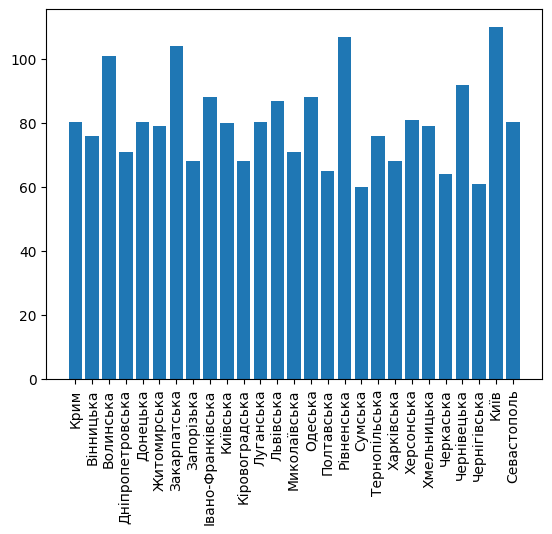

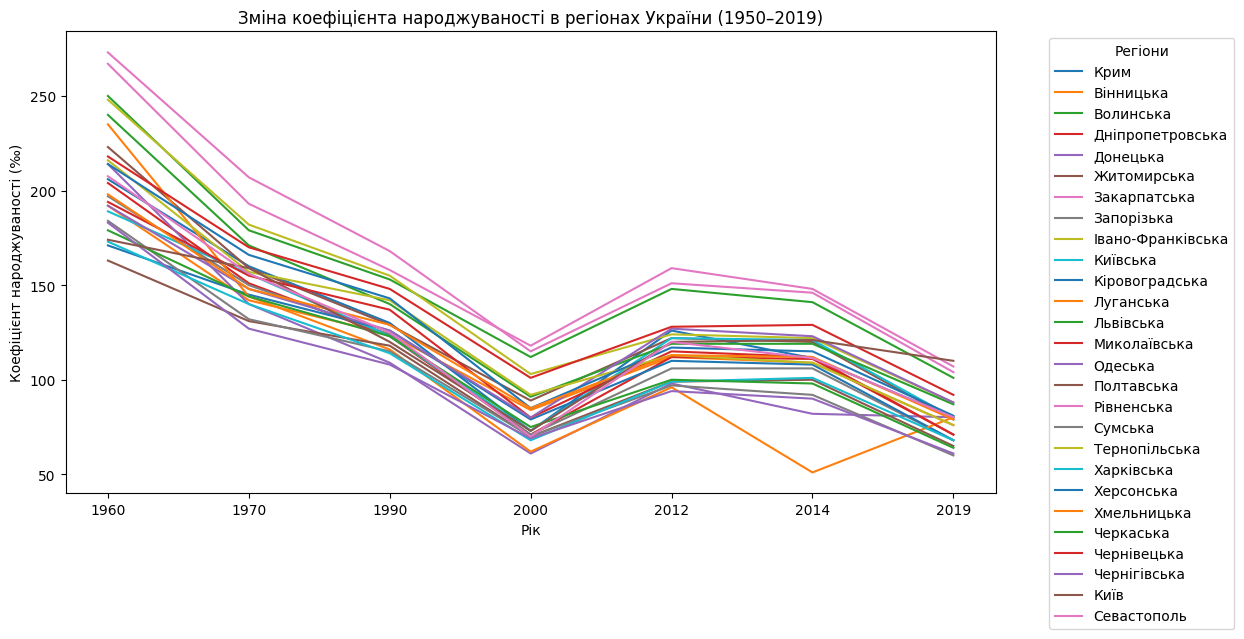

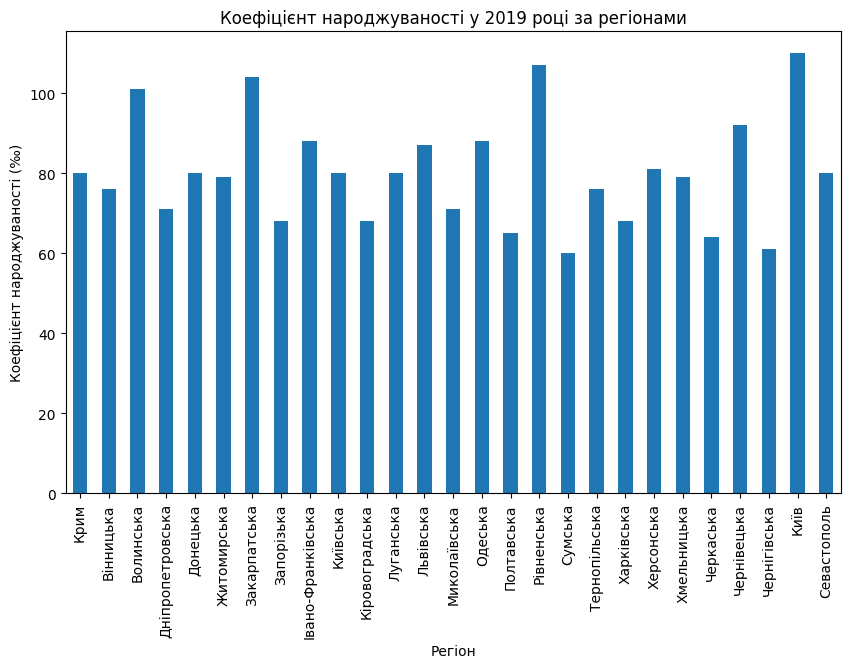

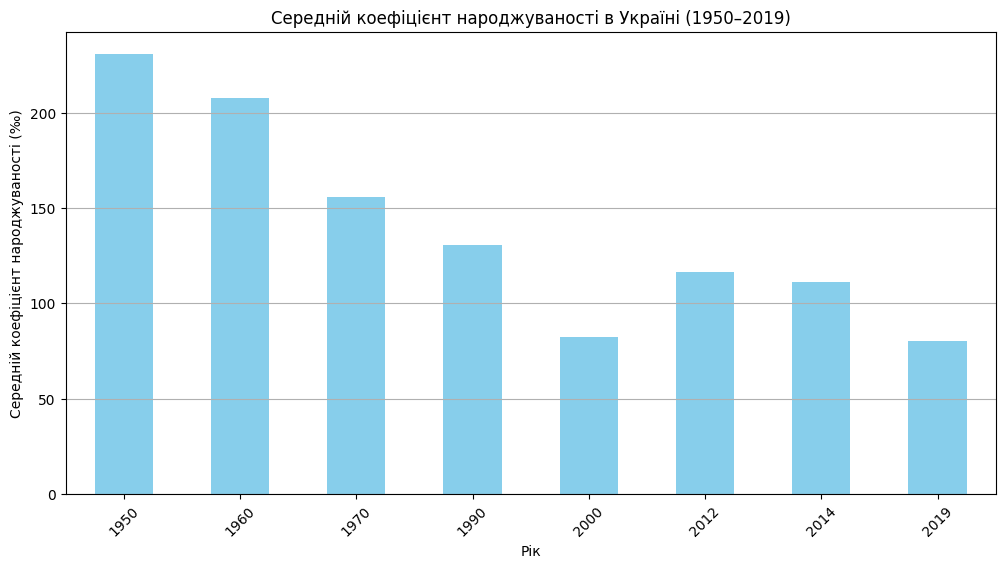

In [1]:
import pandas as pd #type:ignore
import matplotlib.pyplot as plt #type:ignore
import seaborn as sns #type:ignore

#1
df = pd.read_csv("2017_jun_final.csv")
print(f"{df.head()}\n")

#2
print(f"{df.shape}\n")

#3
print(f"{df.dtypes}\n")

#4
missing_ratio = df.isnull().sum() / len(df)
print(f"{missing_ratio}\n")

#5
df_clean = df.dropna(axis=1, how='any')
df_clean["Мова програмування"] = df["Мова програмування"]
print(f"{df_clean.columns}\n")

#6
print(f"{df_clean.isnull().sum() / len(df_clean)}\n")

#7
df_no_na = df.dropna()
print(f"{df_no_na.shape}\n")

#8
python_data = df[df["Мова програмування"] == "Python"]
print(f"{python_data.shape}\n")

#9
grouped = python_data.groupby("Посада")
salary_stats = grouped["Зарплата на місяць"].agg(["min", "max"])
print(f"{salary_stats}\n")

#10
def fill_avg_salary(x):
    return (x["min"] + x["max"]) / 2

#11
salary_stats["avg"] = salary_stats.apply(fill_avg_salary, axis=1)
print(f"{salary_stats}\n")

#12
print(f"{salary_stats['avg'].describe()}\n")

#13
salary_stats.to_csv("salary_stats.csv", index=True)
print(f"salary_stats.csv\n")



def allsalaryforlanguages():
    df = pd.read_csv("2017_jun_final.csv")
    df['Мова програмування'] = df['Мова програмування'].fillna('Не вказано')
    languages = ['Не вказано', 'Python', 'Java', 'C++', 'PHP', 'Perl', 'C', 'JavaScript', 'Scala', 'Ruby/Rails', 'Swift', 'C#/.NET']
    plt.figure(figsize=(10,6))
    colors = plt.cm.tab20.colors
    for i, lang in enumerate(languages):
        df_lang = df[df['Мова програмування'] == lang]
        df_lang['Зарплата на місяць'].plot(kind='kde', label=lang, color=colors[i % len(colors)])
    plt.title('Розподіл зарплат по мовам програмування')
    plt.xlabel('Зарплата')
    plt.ylabel('Ймовірність')
    plt.legend()
    plt.show()

def allsalaryforjobs():
    df = pd.read_csv("2017_jun_final.csv")
    jobs = df['Посада'].dropna().unique().tolist()
    plt.figure(figsize=(10,6))
    df = df[df['Посада'].isin(jobs)]
    stats = df.groupby('Посада')['Зарплата на місяць'].agg(['min', 'max', 'mean']).reindex(jobs)
    stats = stats.sort_values(by='mean', ascending=True)
    plt.figure(figsize=(12,6))
    plt.bar(stats.index, stats['max'], label='Максимальна')
    plt.bar(stats.index, stats['mean'], label='Середня')
    plt.bar(stats.index, stats['min'], label='Мінімальна')
    plt.title('Зарплати програмістів по посадам')
    plt.xlabel('Посада')
    plt.ylabel('Зарплата на місяць')
    plt.legend()
    plt.grid(True)
    plt.show()

def countfromcities():
    city_counts = df['Місто'].value_counts()
    city_percent = city_counts / city_counts.sum()
    main_cities = city_percent[city_percent >= 0.01]
    other_cities = city_percent[city_percent < 0.01]
    main_cities_plot = pd.concat([main_cities, pd.Series({'Інше': other_cities.sum()})])
    fig, axes = plt.subplots(1, 2, figsize=(16,8))
    colors_main = sns.color_palette("tab20", len(main_cities_plot))
    main_cities_plot.plot.pie(
        ax=axes[0],
        colors=colors_main,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        ylabel='')
    axes[0].set_title('Основні міста')
    if not other_cities.empty:
        colors_other = sns.color_palette("tab20", len(other_cities))
        other_cities.plot.pie(
            ax=axes[1],
            colors=colors_other,
            autopct='%1.1f%%',
            startangle=90,
            counterclock=False,
            ylabel='')
        axes[1].set_title('Категорія "Інше"')
    plt.show()

countfromcities()
allsalaryforjobs()
allsalaryforlanguages()




